# Mini Metro Optimization

The goal of this program is to find the optimal design of public transport. 

Properties  of optimal solution:
* passengers are transported to their destination as fast as possible
* the design results in as few congestions as possible

What is available to the metro designer explicitly:
* location of stations and their distances between each other
* each station is marked on map by a symbol
* each station has only one symbol
* number of passengers waiting at a station and their individual destinations (denoted by a list station symbols)
* number of metro lines
* number of trains
* number of cars
* number of interchanges
* number of tunnels

What the metro designer may be able to infer:
* how fast trains travel
* how fast new passengers arrive to their initial stations
* distribution of stations by their symbol (squares, triangles and circles are much more common than stars, crosses, droplets)
* distribution of stations on map by their symbol (may be completely random)
* distribution of passengers across station(may be completely random)
* distribution of passenger destinations at individual stations (may be completely random)

Should be noted:
* passengers appear intelligent - they are capable of switching lines (if those lines intersect) to get to destinations that are not situated on the line(s) that their origin stations have available. it is not known whether the passengers are able to decide their path based on its travel time or whether they choose first available train that will shorten distance between the passenger and their destination. it is also not known if passengers can get lost and travel forever.

## Project plan

Before trying to solve the game with all its nuances I will first attempt to intuitively solve parts of the problem that lead to the most robust solution. At the beginning I will try to only minimize total distance of one line. Then I will try to minimize sum of distances of multiple lines. This adds the issue of passengers not being able to reach a destination that lies on a different line that doesn't intersect with the line they're currently on. I will add this new constraint to my algorithm.

After that I will attempt to minimize the distance between any two types of stations. This is because there are usually multiple stations denoted by the same symbol and passengers don't care at which specific station they finish their journey - as long as the station has passenger's symbol.

Finally I will introduce optimization of train and train car counts on each line, their timing and direction - to minimize the average time it takes to get from one station to another.

I will not consider tunnels and interchanges at this point.

There are certain times when the game allows users to choose one new addition to their inventory from given options. They can be tunnels, new lines (up to the maximum line limit), trains and train cars. The algorithm should be able to tell the user which of the items will maximize their metro plan efficiency better.

At this point I will have an algorithm that produces working solution leading to high scores in the endless mode of the game where the passengers don't overcrowd the stations (which in normal mode would cause the game to terminate) and where it is possible to redesign the metro plan at any point from the bottom up.

It would seem that the only way how I could refine solutions for the normal game mode would be to test them on accurate simulations of the game. The only problem is that I don't have access to the game source code so I can't know some of the very important details of the game. There's no way of telling in what order the new stations show up on the map, with which symbols, in what intervals. And there's no way of telling what is the function that distributes new passengers across their stations of origin.

However, a working accurate simulation could not only help find better solutions, it could also do so by different methods e.g. (deep) reinforcement learning. I have yet to implement such simulation.


### Stage 1: 
* only 1 metro line is considered
* only 1 train (with its 1 car) is considered
* metro can be redesigned any time additional stations are added
* travelling salesman problem - can be optimized with simulated stochastic annealing
* visualization of single-line solution

### Stage 2: 
* more than 1 metro line are considered
* only 1 train (with its 1 car) per metro line is considered
* metro can be redesigned any time additional stations are added
* visualization of multi-line solution

### Stage 3: 
* more than 1 metro line are considered
* more than 1 train per metro line are considered
* additional cars for trains are considered
* metro can be redesigned any time additional stations are added

### Stage 4:
* tell user which item they should choose from the set of items when given the option

## Implementation questions

### How to represent solutions?
* a list representing in what order stations are connected
* what about metro lines that do not form a cycle? significant design decision that will influence the impact of multiple trains on one line and their direction
* a more general design is path generation without enforced cycles but with a chance of cycles occuring anyway
* different measures of single line distance: length of the whole line OR sum of distance between every station and every other station = average distance from any point of origin to every destination OR take into account train direction too
* metro game doesn't permit lines to visit the same station twice = simplification of what the representation must fulfill to be accurate - so it is strictly either a LINE or a CYCLE - nothing else or inbetween
* so the representation may or may not include a cycle breaker - a symbol in line that represents that the two lines stations are not line neighbours
* there may be at most ONE cycle breaker
* thinking whether there is a simpler representation that need not contain cycle breakers
* do there even need to be cycle breakers? are there any guarantees that LINEs or CYCLEs necesarily perform better than the other (for all cases or only some cases)?
* a cycle with two trains going in opposite directions should on average have the best performance
* can't think of a single data structure that could be manipulated with elemental operations that would not need to explicitly add or remove line breakers
* how is neighbourhood of a solution defined - if I want to use a steepest descent search algorithm?
* we can actually define it however we want, the only question is what breadth of neighbourhood do we find optimal?
* without cycle there are two directions the train goes during runtime, changing between runs - with cycle there is one and only direction
* meaning that with cycles it is necessary to make a decision which way the train should go - this could influence performance of only one line but also performance of the whole system - the two different performances are not guaranteed to change together with changes to one line
* I decided to represent a single-line solution as a list of stations representing a cycle and an index (if specified) indicating between which two stations there isn't a line connection (thus breaking the cycle)

### How to compare performance of cyclic and non-cyclic lines?
* cyclic solutions move only in one direction
* non-cyclic solutions move in each direction half of the time
* simulate average performance in both directions in both cases
* while performance of non-cyclic solution will be evaluated twice - once in each direction - the real performance will be an average of the two
* performance of cyclic solution will be evaluated twice - once in each direction - the real performance will be the better of the two
* this applies ONLY TO SINGLE-LINE SOLUTIONS

### What search strategies to use?
* evaluate all permutations of stations to find the best solution
* if I design structure of search space I can use steepest ascent/descent heuristic
* stochastic search algorithm such as simulated annealing

### How to compare performance of different strategies?
* exhaustive: measure how many solution evaluations it takes to find the best solution
* non-exhaustive: measure number of evaluations it takes to find solution that is close enough to the exhaustive best solution
* meta-optimization: trying to find the optimal maximal number of evaluations required to find optimal solution

### How to deal with growing complexity of search heuristics?
* exhaustive evaluation of all solutions will always be a problem
* with growing number of lines my design of neighbourhood relationship creates very large neighbourhoods - all neighbours must be evaluated for steepest descent search
* on the other hand large neighbourhoods provide much finer search of optimal paths of descent
* at some point the performance tax of steepest descent will be too high
* my plan is to create another implementation of my algorithms in a compiled, statically typed language - C, C++, Java or Rust

## Progress
- [x] representation of a single-line solution
- [x] one_solution class for solutions with only one line
- [x] gameplan class for representing the problem
- [x] draw gameplan
- [x] draw solution
- [x] fitness measure using only line length
- [x] exhaustive search for single-line solution
- [x] steepest descent search for single-line solution
- so far simulations are showing that steepest descent yields solutions equally good as exhaustive search - no need for simulated annealing? May be a good idea to implement it anyway in case greedy algorithm starts getting stuck in local minima at more complex problems (or different fitness function)
- [x] simulated annealing for single-line solution
- slightly faster than steepest descent but solutions can sometimes be slightly less optimal than the best possible solutions
- [x] STAGE 1 COMPLETE
- [x] fitness measure using reachability of station from other stations
- [x] representation of n-line solution
- [x] solution class for solutions with any number of lines
- [x] draw solution with multiple lines
- [ ] exhaustive search for n-line solution - only total length considered
- [ ] steepest descent for n-line solution - only total length considered
- [x] simulated annealing for n-line solution - only total length considered
- [x] simulated annealing for n-line solution - total length AND solution validity considered
- [ ] exhaustive search for n-line solution - fitness of reachibility
- [ ] steepest descent for n-line solution - fitness of reachibility
- [ ] simulated annealing for n-line solution - fitness of reachibility


In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools

In [2]:
# x and y correspond to station's location on the grid
class station:
    def __init__(self, symbol, x, y):
        self.symbol = symbol
        self.x = x
        self.y = y

In [3]:
# this distance measuring function is specific to the game
# the line between two stations can be either just a horizontal or vertical line or a combination of diagonal and one of the two
def distance(s1, s2):
    if s1.x==s2.x:
        return abs(s1.y-s2.y)
    elif s1.y==s2.y:
        return abs(s1.x-s2.x)
    else:
        difx = abs(s1.x-s2.x)
        dify = abs(s1.y-s2.y)
        if difx==dify:
            return math.sqrt(2*(difx**2))
        elif difx < dify:
            return dify - difx + math.sqrt(2*(difx**2))
        elif difx > dify:
            return difx - dify + math.sqrt(2*(dify**2))

In [4]:
# this class represents the game plan
class gameplan:
    def __init__(self, n_stations, n_lines):
        self.n_stations = n_stations
        self.n_lines = n_lines
        self.stations = []
        # station distance matrix
        self.distance_m = []
        self.symbols = []
    
    def randomly_initialize(self, symbols, max_s):
        self.symbols = symbols
        # create stations with random locations and symbols
        for i in range(self.n_stations):
            symbol = random.choice(symbols)
            x = random.randint(0, max_s)
            y = random.randint(0, max_s)
            new_station = station(symbol, x, y)
            self.stations.append(new_station)
        # create distance matrix
        self.distance_m = []
        for station_s in self.stations:
            # a vector of distances from one stations
            distances = []
            for station_v in self.stations:
                d = distance(station_s, station_v)
                distances.append(d)
            self.distance_m.append(distances)

In [5]:
def draw_gameplan(gp):
    count = -1
    for station in gp.stations:
        count += 1
        plt.scatter(station.x, station.y, s=100, marker=station.symbol)
        plt.annotate(str(count), (station.x,station.y), 
                 textcoords="offset points", xytext=(0,10), ha='center')
    plt.axis('equal')
    #plt.box(False)
    #plt.axis('off')
    #plt.grid(True)
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['savefig.dpi'] = 200
    plt.show()

In [6]:
class one_solution:
    def __init__(self, gameplan):
        # PATH OF INDICES OF STATIONS, NOT STATIONS THEMSELVES
        self.path = []
        self.gameplan = gameplan
        self.fitness = 0
        # can be either None if there's no cycle breaker or a number indicating after which station the breaker follows
        self.cycle_breaker = None
        # neighbouring solutions
        self.neighbours = []
        # defines direction of path - only important for cyclic solutions where direction 
        # doesn't ever change
        self.should_go_right = True
    
    # cb: False-> no cb, True-> always cb, None-> randomly
    def randomize(self, cyclic=None):
        path = list(range(self.gameplan.n_stations))
        if cyclic is False:
            self.cycle_breaker = random.choice(path)
        # randomly include cycle breaker with 50% probability
        elif cyclic is None and bool(random.getrandbits(1)):
            # select random station after which CB follows
            self.cycle_breaker = random.choice(path)
        random.shuffle(path)
        self.path = path
        
    def set_path(self, path):
        self.path = path
        
    def set_cb(self, cb):
        self.cycle_breaker = cb
        
    def fit(self):
        #self.fitness = self.full_length()
        self.fitness = self.average_distance()
        return self.fitness
    
    # returns the set of neighbouring solutions
    def generate_neighbourhood(self, cyclic=None):
        self.neighbours = []
        # if the current solution is NOT cyclic but we want to make cyclic solutions out of it anyway (unlikely)
        # just create cyclic neighbours anyway and don't create non-cyclic neighbours
        if self.cycle_breaker is None or cyclic is True:
            p_len = self.gameplan.n_stations
            # if there is'nt any cycle breaker
            # switch paths around
            # for each station
            if cyclic is None or cyclic is True:
                for i in range(p_len-1):
                    for j in range(i+1, p_len):
                        if i==0 and j==(p_len-1):
                            continue
                        # reverse subpath
                        new_path = self.path[:]
                        new_path[i:(j+1)] = new_path[i:(j+1)][::-1]
                        new_solution = one_solution(self.gameplan)
                        new_solution.path = new_path
                        self.neighbours.append(new_solution)
            # introduce CB (or not)
            if cyclic is None or cyclic is False:
                for i in range(p_len):
                    new_path = self.path[:]
                    new_solution = one_solution(self.gameplan)
                    new_solution.path = new_path
                    new_solution.cycle_breaker = i
                    self.neighbours.append(new_solution)
        else:
            if cyclic is True or cyclic is None:
                # first without cb
                new_path = self.path[:]
                new_solution = one_solution(self.gameplan)
                new_solution.path = new_path
                self.neighbours.append(new_solution)
            
            if cyclic is False or cyclic is None:
                # switch paths around
                # first copy the path and add cycle breaker into it
                path_with_cb = self.path[:]
                # -1 stands for CB
                path_with_cb.insert(self.cycle_breaker+1, -1)
                p_len = len(path_with_cb)
                for i in range(p_len-1):
                    for j in range(i+1, p_len):
                        if i==0 and j==(p_len-1):
                            continue
                        # reverse subpath
                        new_path = path_with_cb[:]
                        new_path[i:(j+1)] = new_path[i:(j+1)][::-1]
                        where_is_cb = new_path.index(-1)
                        new_path.remove(-1)
                        # if cb is at the beginning, it's the same like being at end - just to keep consistency
                        if where_is_cb==0:
                            where_is_cb = len(new_path)-1
                        else:
                            where_is_cb -= 1
                        new_solution = one_solution(self.gameplan)
                        new_solution.path = new_path
                        new_solution.cycle_breaker = where_is_cb
                        self.neighbours.append(new_solution)
    
    def random_neighbour(self, cyclic=None):
        # if current solution is cyclic
        if self.cycle_breaker is None:
            new_path = self.path[:]
            s_path = len(new_path)
            # get two different random i and j
            i = random.randint(0, s_path-1)
            j = i
            while i==j:
                j = random.randint(0, s_path-1)
                
            if i > j:
                i,j = j,i
                
            # switch paths around
            new_path[i:(j+1)] = new_path[i:(j+1)][::-1]
            new_solution = one_solution(self.gameplan)
            new_solution.path = new_path
            
            # if we want cyclic solution
            if cyclic==True:
                return new_solution
            # if we want non-cyclic solution
            if cyclic==False:
                new_solution.cycle_breaker = random.randint(0, s_path-1)
                return new_solution
            # if we don't mind either
            if cyclic is None:
                # randomly decide if add cycle breaker or not
                if random.randint(0,1)==1:
                    new_solution.cycle_breaker = random.randint(0, s_path-1)
                return new_solution
        
        # if current solution is not cyclic
        else:
            # first copy the path and add cycle breaker into it
            path_with_cb = self.path[:]
            # -1 stands for CB
            path_with_cb.insert(self.cycle_breaker+1, -1)
            
            s_path = len(path_with_cb)
            # get two different random i and j
            i = random.randint(0, s_path-1)
            j = i
            while i==j:
                j = random.randint(0, s_path-1)
                
            if i > j:
                i,j = j,i
                
            new_path = path_with_cb
            new_path[i:(j+1)] = new_path[i:(j+1)][::-1]
            where_is_cb = new_path.index(-1)
            new_path.remove(-1)
            
            # if cb is at the beginning, it's the same like being at end - just to keep consistency
            if where_is_cb==0:
                where_is_cb = len(new_path)-1
            else:
                where_is_cb -= 1
                
            new_solution = one_solution(self.gameplan)
            new_solution.path = new_path
            
            # if we want cyclic solution 
            if cyclic==True:
                return new_solution
            # if we want non-cyclic solution 
            if cyclic==False:
                new_solution.cycle_breaker = where_is_cb
                return new_solution
            # if we don't mind either
            if cyclic is None:
                # randomly decide if add cycle breaker or not
                if random.randint(0,1)==1:
                    new_solution.cycle_breaker = where_is_cb
                return new_solution
    
    # this measure doesn't take into account anything but only the full length
    def full_length(self):
        length = 0
        # for each station
        for i in range(self.gameplan.n_stations):
            # if i is position of the cycle breaker, don't add anything to length
            if self.cycle_breaker is not None:
                if self.cycle_breaker==i:
                    continue
            # else compute the length
            if i < (self.gameplan.n_stations-1):
                # compute normally
                length += self.gameplan.distance_m[self.path[i]][self.path[i+1]]
            else:
                #compute first and last
                length += self.gameplan.distance_m[self.path[i]][self.path[0]]
        return length
    
    # this measure takes into account how far are all types of stations from every station
    # CAREFUL, doesn't take into account possibility of destination NOT being on the line
    # since it is one line solution such possibility is not considered
    def average_distance(self):
        n_stations = self.gameplan.n_stations
        symbols = self.gameplan.symbols
        total = 0
        
        # if it's not cyclic
        if self.cycle_breaker is not None:
            # measure distance in both directions
            # to the right
            # for every station
            for i in range(n_stations):
                i_origin = self.path[i]
                origin_station = self.gameplan.stations[i_origin]
                # for path from station to symbol destination
                for symbol in symbols:
                    # skip possibility of origin and destination being the same station
                    if symbol==origin_station.symbol:
                        continue
                    # now explore the path to measure distance from origin to destination, 
                    # maximum n_stations to the right (because can backtrack with cycle breaker)
                    max_allowed = n_stations * 2
                    
                    going_right = True
                    current_i = i
                    previous_station = station
                    previous_i = i
                    for j in range(0,max_allowed):
                        # if after current station followers cycle breaker, switch direction
                        if going_right and current_i == self.cycle_breaker:
                            going_right = False
                        # CAREFUL! going to the left we must check cycle breaker from the left side!!!!!!
                        if not going_right and current_i == (self.cycle_breaker+1) % n_stations:
                            going_right = True
                        
                        # determine index of the next station
                        previous_i = current_i
                        if going_right:
                            current_i += 1
                            current_i = current_i % n_stations
                        else:
                            current_i -= 1
                            current_i = current_i % n_stations
                        
                        current_path_i = self.path[current_i]
                        previous_path_i = self.path[previous_i]
                        
                        # measure distance
                        distance = self.gameplan.distance_m[previous_path_i][current_path_i]
                        
                        # add it to total
                        total += distance
                        
                        # break if reached symbol
                        current_station = self.gameplan.stations[current_path_i]
                        if current_station.symbol==symbol:
                            break
                        
                    
            # to the left
            # for every station
            for i in range(n_stations):
                i_origin = self.path[i]
                origin_station = self.gameplan.stations[i_origin]
                # for path from station to symbol destination
                for symbol in symbols:
                    # skip possibility of origin and destination being the same station
                    if symbol==origin_station.symbol:
                        continue
                    # now explore the path to measure distance from origin to destination, 
                    # maximum n_stations to the right (because can backtrack with cycle breaker)
                    max_allowed = n_stations * 2
                    
                    going_right = False
                    current_i = i
                    previous_station = station
                    previous_i = i
                    for j in range(0,max_allowed):
                        # if after current station followers cycle breaker, switch direction
                        if going_right and current_i == self.cycle_breaker:
                            going_right = False
                        # CAREFUL! going to the left we must check cycle breaker from the left side!!!!!!
                        if not going_right and current_i == ( (self.cycle_breaker+1) % n_stations ):
                            going_right = True
                        
                        # determine index of the next station
                        previous_i = current_i
                        if going_right:
                            current_i += 1
                            current_i = current_i % n_stations
                        else:
                            current_i -= 1
                            current_i = current_i % n_stations
                        
                        current_path_i = self.path[current_i]
                        previous_path_i = self.path[previous_i]
                        
                        # measure distance
                        distance = self.gameplan.distance_m[previous_path_i][current_path_i]
                        
                        # add it to total
                        total += distance
                        
                        # break if reached symbol
                        current_station = self.gameplan.stations[current_path_i]
                        if current_station.symbol==symbol:
                            break
            # average distance from any origin to any destination, 
            # len symbols minus one because the one is when origin = destination
            total = total / (n_stations * 2 * (len(symbols)-1))
            
            return total
        # if it is cyclic
        else:
            # direction to the right
            total_right = 0
            for i in range(n_stations):
                i_origin = self.path[i]
                origin_station = self.gameplan.stations[i_origin]
                # for path from station to symbol destination
                for symbol in symbols:
                    # skip possibility of origin and destination being the same station
                    if symbol==origin_station.symbol:
                        continue
                    # now explore the path to measure distance from origin to destination, 
                    # maximum n_stations to the right (because can backtrack with cycle breaker)
                    max_allowed = n_stations
                    
                    current_i = i
                    previous_station = station
                    previous_i = i
                    for j in range(0,max_allowed):
                        
                        # determine index of the next station
                        previous_i = current_i
                        current_i += 1
                        current_i = current_i % n_stations
                        
                        current_path_i = self.path[current_i]
                        previous_path_i = self.path[previous_i]
                        
                        # measure distance
                        distance = self.gameplan.distance_m[previous_path_i][current_path_i]
                        
                        # add it to total
                        total_right += distance
                        
                        # break if reached symbol
                        current_station = self.gameplan.stations[current_path_i]
                        if current_station.symbol==symbol:
                            break
            
            total_right = total_right / (n_stations * (len(symbols)-1))
            
            # direction to the left
            total_left = 0
            for i in range(n_stations):
                i_origin = self.path[i]
                origin_station = self.gameplan.stations[i_origin]
                # for path from station to symbol destination
                for symbol in symbols:
                    # skip possibility of origin and destination being the same station
                    if symbol==origin_station.symbol:
                        continue
                    # now explore the path to measure distance from origin to destination, 
                    # maximum n_stations to the right (because can backtrack with cycle breaker)
                    max_allowed = n_stations
                    
                    current_i = i
                    previous_station = station
                    previous_i = i
                    for j in range(0,max_allowed):
                        
                        # determine index of the next station
                        previous_i = current_i
                        current_i -= 1
                        current_i = current_i % n_stations
                        
                        current_path_i = self.path[current_i]
                        previous_path_i = self.path[previous_i]
                        
                        # measure distance
                        distance = self.gameplan.distance_m[previous_path_i][current_path_i]
                        
                        # add it to total
                        total_left += distance
                        
                        # break if reached symbol
                        current_station = self.gameplan.stations[current_path_i]
                        if current_station.symbol==symbol:
                            break
            
            total_left = total_left / (n_stations * (len(symbols)-1))
            
            if total_right > total_left:
                self.should_go_right = True
                return total_right
            else:
                self.should_go_right = False
                return total_left
            
    
    def __str__(self):
        res = str(self.path[0])
        for i in self.path[1:]:
            res+=" → "+str(i)
        if self.cycle_breaker is None:
            res+=" CB: None"
        else:
            res+=" CB: "+str(self.cycle_breaker)
        # careful, fitness gets calculated implicitly if showing as string
        res+=" Fitness: "+str(self.fit())
        return res
        

In [7]:
-1 % 5

4

In [8]:
def draw_solution(solution):
    # drawing map
    count = -1
    for station in solution.gameplan.stations:
        count += 1
        plt.scatter(station.x, station.y, s=100, marker=station.symbol)
        plt.annotate(str(count), (station.x,station.y), 
                 textcoords="offset points", xytext=(0,10), ha='center')
    plt.axis('equal')
    
    # drawing path
    for i in range(solution.gameplan.n_stations):
        if solution.cycle_breaker is not None:
            if i==solution.cycle_breaker:
                continue
        if i < (solution.gameplan.n_stations - 1):
            s1 = solution.gameplan.stations[solution.path[i]]
            s2 = solution.gameplan.stations[solution.path[i+1]]
            x_d = s2.x - s1.x
            y_d = s2.y - s1.y
            plt.arrow(s1.x, s1.y, x_d, y_d, length_includes_head=True, head_width=0.15, head_length=0.3)
        else:
            s1 = solution.gameplan.stations[solution.path[i]]
            s2 = solution.gameplan.stations[solution.path[0]]
            x_d = s2.x - s1.x
            y_d = s2.y - s1.y
            plt.arrow(s1.x, s1.y, x_d, y_d, length_includes_head=True, head_width=0.15, head_length=0.3)
    #plt.box(False)
    #plt.axis('off')
    #plt.grid(True)
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['savefig.dpi'] = 200
    plt.show()

In [31]:
gp = gameplan(5, 1)
# these are symbols recognized by matplotlib
gp.randomly_initialize(['o', 's', '^'], 10)
np.matrix(gp.distance_m)

matrix([[ 0.        , 10.89949494,  7.07106781,  8.41421356,  7.24264069],
        [10.89949494,  0.        ,  3.82842712,  6.        ,  4.82842712],
        [ 7.07106781,  3.82842712,  0.        ,  5.24264069,  2.41421356],
        [ 8.41421356,  6.        ,  5.24264069,  0.        ,  2.82842712],
        [ 7.24264069,  4.82842712,  2.41421356,  2.82842712,  0.        ]])

In [9]:
s = one_solution(gp)
#s.path = [0,1,2,3,4]
s.randomize()
print(s)

4 → 1 → 3 → 0 → 2 CB: 4 Fitness: 30.14213562373095


In [10]:
s.generate_neighbourhood(cyclic=None)
for sol in s.neighbours:
    print(sol)

4 → 1 → 3 → 0 → 2 CB: None Fitness: 35.55634918610404
1 → 4 → 3 → 0 → 2 CB: 4 Fitness: 30.31370849898476
3 → 1 → 4 → 0 → 2 CB: 4 Fitness: 26.485281374238568
0 → 3 → 1 → 4 → 2 CB: 4 Fitness: 24.72792206135786
2 → 0 → 3 → 1 → 4 CB: 4 Fitness: 30.142135623730955
4 → 3 → 1 → 0 → 2 CB: 4 Fitness: 33.65685424949238
4 → 0 → 3 → 1 → 2 CB: 4 Fitness: 26.14213562373095
4 → 2 → 0 → 3 → 1 CB: 4 Fitness: 33.14213562373095
4 → 2 → 0 → 3 → 1 CB: 0 Fitness: 30.142135623730955
4 → 1 → 0 → 3 → 2 CB: 4 Fitness: 29.556349186104047
4 → 1 → 2 → 0 → 3 CB: 4 Fitness: 26.14213562373095
4 → 1 → 2 → 0 → 3 CB: 1 Fitness: 30.31370849898476
4 → 1 → 3 → 2 → 0 CB: 4 Fitness: 32.14213562373095
4 → 1 → 3 → 2 → 0 CB: 2 Fitness: 26.48528137423857
4 → 1 → 3 → 0 → 2 CB: 3 Fitness: 24.727922061357855


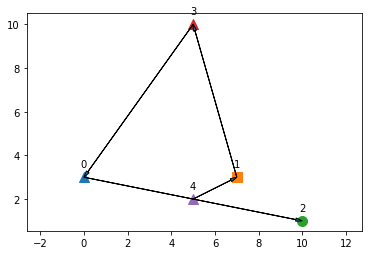

In [11]:
draw_solution(s)

In [32]:
# search strategies:
# all permutations
# steepest descent
# simulated annealing

In [9]:
# function for generating a list of permutations
def iterper(lst):
    perms = []
    pobj = list(itertools.permutations(lst))
    for p in pobj:
        perms.append(list(p))
    return perms

In [10]:
class one_search:
    def __init__(self, gameplan):
        self.gp = gameplan
    
    # cyclic option is important because non-cyclic solution will necessarily have shorter length
    def exhaustive(self, cyclic=True):
        # use gameplan to evaluate and explore all solutions
        n_stations = self.gp.n_stations
        path_p = iterper(list(range(n_stations)))
        best = one_solution(self.gp)
        best.randomize(cyclic=cyclic)
        best.fit()
        
        for path in path_p:
            if cyclic==True or cyclic is None:
                # one without cb
                sol = one_solution(self.gp)
                sol.path = path
                sol.fit()
                if sol.fitness < best.fitness:
                    print(sol)
                    best = sol
            
            if cyclic==False or cyclic is None:
                # rest with cb at different positions
                for cb in range(n_stations):
                    sol = one_solution(self.gp)
                    sol.path = path
                    sol.cycle_breaker = cb
                    sol.fit()
                    if sol.fitness < best.fitness:
                        print(sol)
                        best = sol
            
        
        return best
    
    def steepest_descent(self, cyclic=None):
        # first generate a random solution
        n_stations = self.gp.n_stations
        new_best = one_solution(self.gp)
        new_best.randomize(cyclic=cyclic)
        new_best.fit()
        best = None
        # then generate neighbourhood
        iterate = True
        while iterate:
            iterate = False
            best = new_best
            best.generate_neighbourhood(cyclic=cyclic)
            # choose the best neighbour (if there is any)
            for neighbour in best.neighbours:
                neighbour.fit()
                if neighbour.fitness < new_best.fitness:
                    iterate = True
                    new_best = neighbour
                    print(new_best)
        return best
    
    # in this algorithm fitness corresponds to potential energy of a system (solution)
    def annealing(self, cyclic=None, t0=10000, iterations=2000):
        # first a random solution
        current = one_solution(self.gp)
        current.randomize(cyclic=cyclic)
        current.fit()
        
        best = current

        # set initial temperature
        t = t0
        
        # iterate until temperature is smaller than 1
        while t > 1:
            # generate neighbour - generate all or only 1? only 1
            neighbour = current.random_neighbour(cyclic=cyclic)
            neighbour.fit()
            # if neighbour better, set neighbour as current solution
            if neighbour.fitness < current.fitness:
                current = neighbour
                # if it's better than current best, change current best to it
                if current.fitness < best.fitness:
                    best = current
                    print(best)
            # else check energy of the system and temperature to get probability whether to accept worse solution
            else:
                if self.thermodynamic_probability(current.fitness, neighbour.fitness, t) > random.random():
                    # accept worse solution
                    new_best = neighbour
            
            t = self.temp_geom(t)
        
        return best
               
    
    def thermodynamic_probability(self, current, neighbour, temperature):
        delta = current - neighbour
        return math.exp(delta/temperature)
        
    
    def temp_linear(self, t):
        alpha = 10
        return t-alpha
    
    def temp_geom(self, t):
        # must be lower than 1
        alpha = 0.997
        return t*alpha
    
    def temp_slow(self, t):
        beta = 1
        return t/(1+beta * t)

In [55]:
# code for finding a solution
gp = gameplan(10, 1)
# these are symbols recognized by matplotlib
gp.randomly_initialize(['o', 's', '^'], 10)

In [56]:
ss = one_search(gp)
solution = ss.exhaustive(cyclic=None)
#solution = ss.steepest_descent(cyclic=True)
draw_solution(solution)

0 → 1 → 2 → 3 → 4 → 5 → 6 → 7 → 8 → 9 CB: None Fitness: 30.075588001646572
0 → 1 → 2 → 3 → 4 → 5 → 8 → 7 → 6 → 9 CB: None Fitness: 29.02289680818846
0 → 1 → 2 → 3 → 4 → 5 → 9 → 6 → 7 → 8 CB: None Fitness: 28.47645019878173
0 → 1 → 2 → 3 → 4 → 6 → 5 → 7 → 8 → 9 CB: None Fitness: 28.0873629022557
0 → 1 → 2 → 3 → 4 → 6 → 5 → 9 → 7 → 8 CB: None Fitness: 27.31162697096762
0 → 1 → 2 → 3 → 4 → 6 → 7 → 8 → 5 → 9 CB: None Fitness: 23.39533188057742
0 → 1 → 2 → 3 → 4 → 6 → 7 → 8 → 9 → 5 CB: None Fitness: 21.450966799187817
0 → 1 → 2 → 4 → 6 → 3 → 7 → 8 → 9 → 5 CB: None Fitness: 20.43441917710342
0 → 1 → 5 → 8 → 7 → 3 → 6 → 4 → 2 → 9 CB: None Fitness: 19.8539105243401
0 → 1 → 5 → 9 → 2 → 3 → 4 → 6 → 7 → 8 CB: None Fitness: 19.74974746830585
0 → 1 → 5 → 9 → 2 → 4 → 6 → 3 → 7 → 8 CB: None Fitness: 19.016042558696068
0 → 1 → 8 → 7 → 3 → 6 → 4 → 2 → 9 → 5 CB: None Fitness: 18.64386001800127


KeyboardInterrupt: 

8 → 1 → 9 → 7 → 4 → 6 → 5 → 0 → 3 → 2 CB: None Fitness: 32.433556979968294
6 → 4 → 7 → 9 → 8 → 1 → 5 → 0 → 3 → 2 CB: None Fitness: 28.87792206135787
4 → 6 → 7 → 9 → 8 → 1 → 5 → 0 → 3 → 2 CB: None Fitness: 27.683556979968266
0 → 5 → 1 → 8 → 9 → 7 → 4 → 6 → 3 → 2 CB: None Fitness: 25.872287142747457
6 → 4 → 7 → 8 → 9 → 1 → 5 → 0 → 3 → 2 CB: None Fitness: 25.1323376490863
4 → 6 → 7 → 8 → 9 → 1 → 5 → 0 → 3 → 2 CB: None Fitness: 24.137972567696693
0 → 5 → 1 → 9 → 8 → 7 → 4 → 6 → 3 → 2 CB: None Fitness: 22.12670273047589
5 → 0 → 1 → 9 → 8 → 7 → 4 → 6 → 3 → 2 CB: None Fitness: 21.619595949289337
9 → 1 → 5 → 0 → 8 → 7 → 4 → 6 → 3 → 2 CB: None Fitness: 20.487615433949887
9 → 5 → 1 → 0 → 8 → 7 → 4 → 6 → 3 → 2 CB: None Fitness: 19.799747468305846
9 → 1 → 5 → 0 → 8 → 7 → 3 → 6 → 4 → 2 CB: None Fitness: 19.562489168102793
9 → 5 → 1 → 0 → 8 → 7 → 3 → 6 → 4 → 2 CB: None Fitness: 19.016042558696064
9 → 5 → 0 → 1 → 8 → 7 → 3 → 6 → 4 → 2 CB: None Fitness: 18.64386001800127


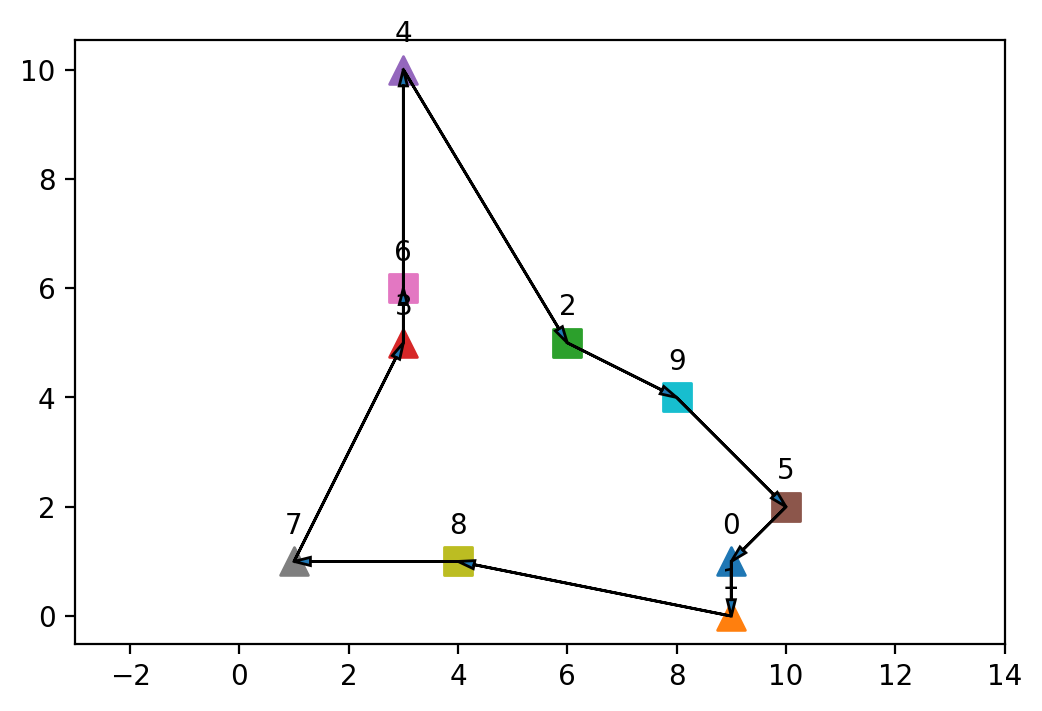

In [57]:
solution = ss.steepest_descent(cyclic=None)
draw_solution(solution)

0 → 2 → 1 → 3 → 5 → 9 → 6 → 7 → 8 → 4 CB: None Fitness: 38.14959953866434
0 → 5 → 3 → 1 → 2 → 9 → 6 → 7 → 8 → 4 CB: None Fitness: 35.695436482630086
0 → 5 → 3 → 6 → 9 → 2 → 1 → 7 → 8 → 4 CB: None Fitness: 32.77497833620559
0 → 5 → 3 → 6 → 9 → 1 → 2 → 7 → 8 → 4 CB: None Fitness: 32.25487732352793
5 → 0 → 3 → 6 → 9 → 1 → 2 → 7 → 8 → 4 CB: None Fitness: 31.360512242138327
5 → 0 → 3 → 6 → 4 → 8 → 7 → 2 → 1 → 9 CB: None Fitness: 25.936500705120544
5 → 0 → 8 → 4 → 6 → 3 → 7 → 2 → 1 → 9 CB: None Fitness: 25.59299782086612
5 → 0 → 1 → 2 → 7 → 3 → 6 → 4 → 8 → 9 CB: None Fitness: 25.05218613006979
5 → 0 → 1 → 2 → 7 → 4 → 6 → 3 → 8 → 9 CB: None Fitness: 24.55218613006979
5 → 0 → 1 → 2 → 7 → 8 → 3 → 6 → 4 → 9 CB: None Fitness: 21.71934341759517
5 → 0 → 1 → 2 → 4 → 6 → 3 → 8 → 7 → 9 CB: None Fitness: 21.59446968344225
5 → 0 → 1 → 7 → 8 → 3 → 6 → 4 → 2 → 9 CB: None Fitness: 20.103910524340115
5 → 0 → 1 → 8 → 7 → 3 → 6 → 4 → 2 → 9 CB: None Fitness: 18.64386001800127


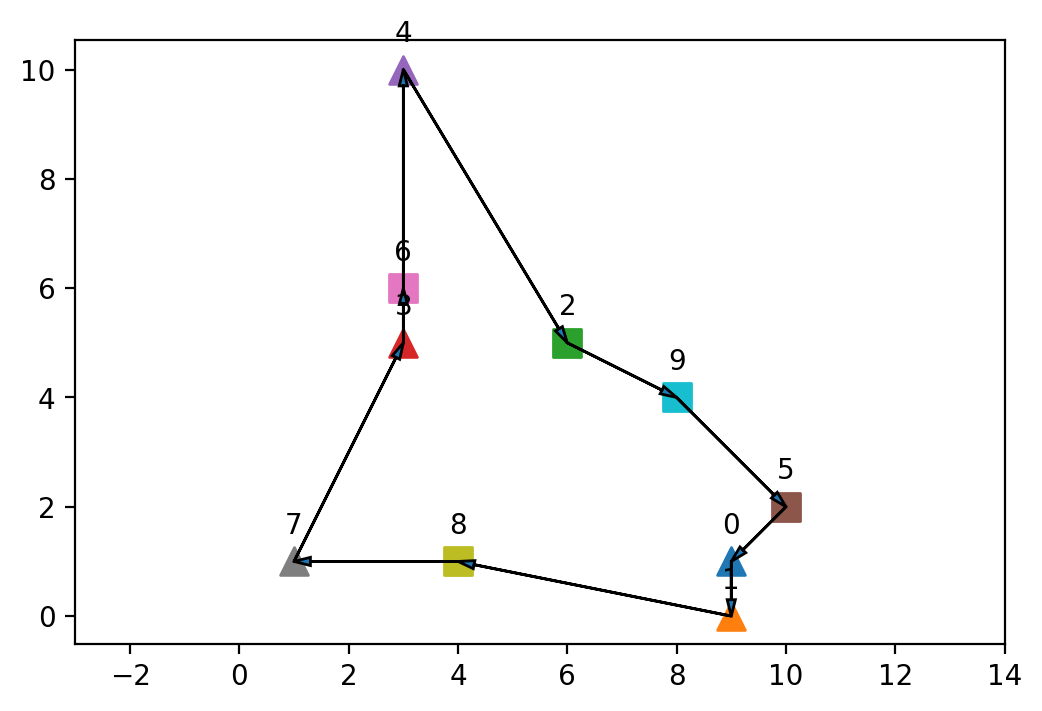

In [58]:
ss = one_search(gp)
solution = ss.annealing(cyclic=None)
draw_solution(solution)

In [122]:
class line:
    def __init__(self, gp):
        self.gp = gp
        self.path = []
        self.cycle_breaker = None
        # defines direction of path - only important for cyclic solutions
        self.should_go_right = True
    
    def __str__(self):
        s_path = [str(i) for i in self.path]
        res = " → ".join(s_path)
        if self.cycle_breaker is None:
            res+=" CB: None"
        else:
            res+=" CB: "+str(self.cycle_breaker)
        return res
    
    def full_length(self):
        length = 0
        # for each station
        for i in range(len(self.path)):
            # if i is position of the cycle breaker, don't add anything to length
            if self.cycle_breaker is not None:
                if self.cycle_breaker==i:
                    continue
            # else compute the length
            if i < (len(self.path)-1):
                # compute normally
                length += self.gp.distance_m[self.path[i]][self.path[i+1]]
            else:
                #compute first and last
                length += self.gp.distance_m[self.path[i]][self.path[0]]
        # BUT if it is only 2 stations, a cycle of 2 stations is the same as non-cycle
        if len(self.path)==2:
            length = self.gp.distance_m[self.path[0]][self.path[1]]
        return length
        

class multi_solution:
    def __init__(self, gp):
        self.gp = gp
        # objects of individual lines
        self.lines = []
        self.fitness = 0
        self.neighbours = []
    
    def randomize(self, cyclic=None):
        n_lines = gp.n_lines
        stations = list(range(len(gp.stations)))
        station_total_counts = []
        lines = []
                
        # in how many lines a station will be 
        # minimum 1 (a station must be included in the solution), maximum in all lines
        for station in stations:
            station_total_counts.append(random.randint(1, n_lines))
        
        # create lines
        for l in range(n_lines):
            lines.append(line(self.gp))
            
        # add stations to lines specified number of times
        for station in range(len(stations)):
            n_times_to_add = station_total_counts[station]
            lines_to_add = random.sample(lines, n_times_to_add)
            print("Adding {0} of station {1} to line".format(n_times_to_add, station))
            for l in lines_to_add:
                l.path.append(station)
        
        for l in lines:
            # add cycle breaker
            if cyclic is False:
                l.cycle_breaker = random.randint(0, len(l.path)-1)
            elif cyclic is None:
                if random.randint(0, 1)==1:
                    l.cycle_breaker = random.randint(0, len(l.path)-1)
            # if cyclic is True, don't add any CBs 
            
            # if line contains only 1 station, add another one
            if len(l.path)==1:
                chosen_station = random.choice(stations)
                # if the same oen chosen, try again
                while chosen_station==l.path[0]:
                    chosen_station = random.choice(stations)
                l.path.append(chosen_station)
                # what point of CB in a 2-station line? NO POINT
                l.cycle_breaker = None
            # shuffle paths
            random.shuffle(l.path)
            
            
            
        self.lines = lines
    
    # check whether passengers can get from their station of origin to their destination
    def is_valid(self):
        # create a list of symbols that are present on each line
        list_lists_of_symbols = []
        list_lists_of_paths = []
        for l in self.lines:
            list_of_symbols = []
            for s in l.path:
                symbol = self.gp.stations[s].symbol
                if symbol not in list_of_symbols:
                    list_of_symbols.append(symbol)
            list_lists_of_symbols.append(list_of_symbols)
            list_lists_of_paths.append(l.path[:])
        
        # now check each line whether it either contains a set of all symbols
        # - if it doesn't, check if it intersects with another line that does contain the symbol
        found_intersection = True
        while found_intersection:
            found_intersection = False
            found_bad = False
            for l_i in range(len(list_lists_of_paths)):
                if len(list_lists_of_paths[l_i]) != 0:
                    if len(list_lists_of_symbols[l_i])!=len(gp.symbols):
                        # bad, this line doesn't contain all symbols it needs
                        found_bad = True
                        # find intersection
                        for l_j in range(len(list_lists_of_paths)):
                            # if it isn't the same line
                            if l_i is not l_j:
                                intersection = [x for x in list_lists_of_paths[l_i] if x in list_lists_of_paths[l_j]]
                                # if there was intersection found
                                if len(intersection) > 0:
                                    found_intersection = True
                                    # make union of the two paths and the two symbol lists
                                    # by pouring everything from j into i
                                    for j in list_lists_of_paths[l_j]:
                                        if j not in list_lists_of_paths[l_i]:
                                            list_lists_of_paths[l_i].append(j)
                                    
                                    for j in list_lists_of_symbols[l_j]:
                                        if j not in list_lists_of_symbols[l_i]:
                                            list_lists_of_symbols[l_i].append(j)
                                    
                                    # finally empty j
                                    list_lists_of_paths[l_j] = []
                                    list_lists_of_symbols[l_j] = []
                                    
                                    # and continue with another iteration - first break out of one loop
                                    break
               
                # and then break out of the other loop
                if found_intersection:
                    break
                                
                        
            # if no badness found in the list, the solution is valid
            if found_bad is False:
                # this is just for debugging of how the algorithm works
                #for (i,j) in zip(list_lists_of_paths,list_lists_of_symbols):
                #    print("{0}---{1}".format(i,j))
                return True
            # found no intersection while there is still badness, the solution must be invalid
            if found_bad is True and found_intersection is False:
                return False
        
                
    def fit(self):
        self.fitness = self.full_length()
        return self.fitness
    
    def full_length(self):
        length = 0
        for l in self.lines:
            length += l.full_length()
        return length
    
    def __str__(self):
        res = "Fitness: {0}\n".format(self.fitness)
        for line in self.lines:
            res+=str(line)+"\n"
        return res
    
    def get_random_neighbour(self, cyclic=None):
        new_solution = multi_solution(self.gp)
        # first copy this neighbour
        for l in self.lines:
            new_line = line(self.gp)
            new_line.path = l.path[:]
            new_line.cycle_breaker = l.cycle_breaker
            new_solution.lines.append(new_line)
        # types of neighbouring:
            # permutation
                # of x lines
            # add or remove station
            # add, remove or modify CB
        # what probability of each type of neighbour? uniform?
        # calculate how many individuals each type generates
        # addition: for all stations check which lines don't contain it yet - it can be inserted into any position on the line
        #addition = 0
        #station_index = list(range(self.gp.n_stations))
        #for s in station_index:
        # SCRATCH THAT - this calculation could take longer than creating a neighbour
        
        # the probability will be uniform
        
        which_operation = random.randint(1,3)
        # if it's cyclic, don't do any CB operations
        # assuming there aren't any CBs in any of the lines
        if cyclic==True:
            which_operation = random.randint(2,3)
        
        
        if which_operation==3:
            # permutation
            permutable = []
            for l in new_solution.lines:
                # no real permutations until the path is at least 4 stations long
                if len(l.path) > 3 or (len(l.path) > 2 and l.cycle_breaker is not None):
                    permutable.append(l)
            
            # not enough stations to permute,
            if len(permutable)==0:
                which_operation = 2
            else:
                chosen_line = random.choice(permutable)

                if chosen_line.cycle_breaker is not None:
                    # add cycle breaker as a symbol
                    chosen_line.path.insert(chosen_line.cycle_breaker+1, -1)

                first_i = random.randint(0, len(chosen_line.path)-1)
                second_i = random.randint(0, len(chosen_line.path)-1)
                while first_i==second_i:
                    second_i = random.randint(0, len(chosen_line.path)-1)
                if first_i > second_i:
                    first_i, second_i = second_i, first_i

                chosen_line.path[first_i:(second_i+1)] = chosen_line.path[first_i:(second_i+1)][::-1]
                
                if chosen_line.cycle_breaker is not None:
                    chosen_line.cycle_breaker = chosen_line.path.index(-1)-1
                    chosen_line.path.remove(-1)
                    if chosen_line.cycle_breaker==-1:
                        chosen_line.cycle_breaker = len(chosen_line.path)-1
            
        if which_operation==1:
            # add, remove or modify CB
            # decide if there are lines where cb can be added or not
            contains_cb = []
            no_cb = []
            # no point in CB operations on lines with only 2 stations
            for l in new_solution.lines:
                if l.cycle_breaker is None and len(l.path) > 2:
                    no_cb.append(l)
                elif len(l.path) > 2:
                    contains_cb.append(l)
            
            which_suboperation = random.randint(1,3)
            
            if cyclic==False:
                # if it's NOT cyclic, the only thing we can do is modify position of cb
                which_suboperation = 1
            elif len(contains_cb) == 0:
                # if no line contains cb, the only modification is adding one
                which_suboperation = 3
            elif len(no_cb) == 0:
                # if all lines contain cb, we can't add them, only remove or modify
                which_suboperation = random.randint(1,2)
                
            # no point in CB operations on lines with only 2 stations
            if len(contains_cb) == 0 and len(no_cb) == 0:
                which_suboperation = 4
                
                
            if which_suboperation==1:
                # modify position of CB
                which_line = random.choice(contains_cb)
                which_line.cycle_breaker = random.randint(0, len(which_line.path)-1)
            elif which_suboperation==2:
                # remove CB
                which_line = random.choice(contains_cb)
                which_line.cycle_breaker = None
            elif which_suboperation==3: 
                # add CB
                which_line = random.choice(no_cb)
                which_line.cycle_breaker = random.randint(0, len(which_line.path)-1)
            elif which_suboperation==4:
                # this means there is no CB operation possible
                which_operation = random.randint(2,3)
                
        if which_operation==2:
            # add or remove station
            # if we remove a station, we must verify that the new solution isn't invalid - that every station is in the solution at least once
            which_nonfull = []
            which_full = []
            for l in new_solution.lines:
                if len(l.path) == self.gp.n_stations:
                    which_full.append(l)
                else:
                    which_nonfull.append(l)
            
            which_suboperation = random.randint(1,2)
            
            if len(which_nonfull)==0:
                # if there aren't any nonfull lines, we can only remove station
                which_suboperation = 1
            
            if which_suboperation==1:
                # remove station
                # find stations that are more than once in the list of stations
                removable_stations = []
                stations = list(range(self.gp.n_stations))
                for s in stations:
                    counter = 0
                    for l in new_solution.lines:
                        if s in l.path:
                            counter += 1
                    if counter > 1:
                        removable_stations.append(s)
                # if there aren't any removable stations, skip to addition of new stations
                if len(removable_stations) == 0:
                    which_suboperation = 2
                else:
                    to_remove = random.choice(removable_stations)
                    removable_lines = []
                    for l in new_solution.lines:
                        if to_remove in l.path:
                            if len(l.path) > 2:
                                removable_lines.append(l)
                            # this is tricky, what if the line contains only 2 stations? can't leave only one station in line
                            else:
                                full_line_removable = True
                                for s in l.path:
                                    if s not in removable_stations:
                                        full_line_removable = False
                                if full_line_removable:
                                    removable_lines.append(l)
                                    
                    # if there are in the end no removable lines, just go to station addition
                    if len(removable_lines)==0:
                        which_suboperation = 2
                    else:
                        chosen_line = random.choice(removable_lines)
                        index_to_remove = chosen_line.path.index(to_remove)
                        # if no cycle breaker, just remove the station
                        if chosen_line.cycle_breaker is None:
                            del chosen_line.path[index_to_remove]
                        else:
                            if chosen_line.cycle_breaker > index_to_remove:
                                del chosen_line.path[index_to_remove]
                                chosen_line.cycle_breaker -= 1
                            elif chosen_line.cycle_breaker < index_to_remove:
                                del chosen_line.path[index_to_remove]
                            elif chosen_line.cycle_breaker == index_to_remove:
                                del chosen_line.path[index_to_remove]
                                chosen_line.cycle_breaker = None
                        if len(chosen_line.path)==1:
                            del chosen_line.path[0]
                            chosen_line.cycle_breaker = None
                            
                

            # not elif because if removing any station results in invalid solution then we can only add station
            if which_suboperation==2:
                # add station
                chosen_line = random.choice(which_nonfull)
                # this to make sure that there are AT LEAST TWO STATIONS on one line
                while len(chosen_line.path) < 2:
                    addable_stations = []
                    stations = list(range(self.gp.n_stations))
                    for s in stations:
                        if s not in chosen_line.path:
                            addable_stations.append(s)
                    station_to_add = random.choice(addable_stations)
                    index_to_add = random.randint(0, len(chosen_line.path))
                    if chosen_line.cycle_breaker is None:
                        chosen_line.path.insert(index_to_add, station_to_add)
                    else:
                        if chosen_line.cycle_breaker > index_to_add:
                            chosen_line.cycle_breaker += 1
                            chosen_line.path.insert(index_to_add, station_to_add)
                        elif chosen_line.cycle_breaker < index_to_add:
                            chosen_line.path.insert(index_to_add, station_to_add)
                        elif chosen_line.cycle_breaker == index_to_add:
                            chosen_line.path.insert(index_to_add, station_to_add)
                            chosen_line.cycle_breaker += 1
                    #print("Adding station {0} from selection of stations {1} to line {2} at index {3}.".format(station_to_add, ))
                            
        return new_solution
                
            
    
def draw_multi(solution):
        # drawing map
    count = -1
    for station in solution.gp.stations:
        count += 1
        plt.scatter(station.x, station.y, s=100, marker=station.symbol)
        plt.annotate(str(count), (station.x,station.y), 
                 textcoords="offset points", xytext=(0,10), ha='center')
    plt.axis('equal')
    
    colours = ['red', 'blue', 'green', 'yellow']
    c_counter = -1
    # drawing path
    for l in solution.lines:
        c_counter += 1
        c_index = c_counter % len(colours)
        path = l.path
        for i in range(len(path)):
            if l.cycle_breaker is not None:
                if i==l.cycle_breaker:
                    continue
            if i < (len(path) - 1):
                s1 = solution.gp.stations[path[i]]
                s2 = solution.gp.stations[path[i+1]]
                x_d = s2.x - s1.x
                y_d = s2.y - s1.y
                plt.arrow(s1.x, s1.y, x_d, y_d, length_includes_head=True, head_width=0.15, head_length=0.3, linestyle=":", alpha=0.5, color=colours[c_index])
            else:
                s1 = solution.gp.stations[path[i]]
                s2 = solution.gp.stations[path[0]]
                x_d = s2.x - s1.x
                y_d = s2.y - s1.y
                plt.arrow(s1.x, s1.y, x_d, y_d, length_includes_head=True, head_width=0.15, head_length=0.3, linestyle=":", alpha=0.5, color=colours[c_index])
    #plt.box(False)
    #plt.axis('off')
    #plt.grid(True)
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams['savefig.dpi'] = 200
    plt.show()
        

In [102]:
a = [1,2,4]
b = [4,2,6]
[x for x in a if x in b]

[2, 4]

In [123]:
gp = gameplan(10, 3)
gp.randomly_initialize(['o', 's', '^'], 10)

In [124]:
sol = multi_solution(gp)
sol.randomize()
sol.fit()

Adding 3 of station 0 to line
Adding 1 of station 1 to line
Adding 3 of station 2 to line
Adding 1 of station 3 to line
Adding 3 of station 4 to line
Adding 2 of station 5 to line
Adding 1 of station 6 to line
Adding 1 of station 7 to line
Adding 1 of station 8 to line
Adding 2 of station 9 to line


98.66904755831214

In [125]:
print(sol)

Fitness: 98.66904755831214
7 → 4 → 0 → 2 CB: 0
5 → 8 → 2 → 0 → 9 → 4 → 6 CB: 2
3 → 1 → 9 → 2 → 4 → 0 → 5 CB: 6



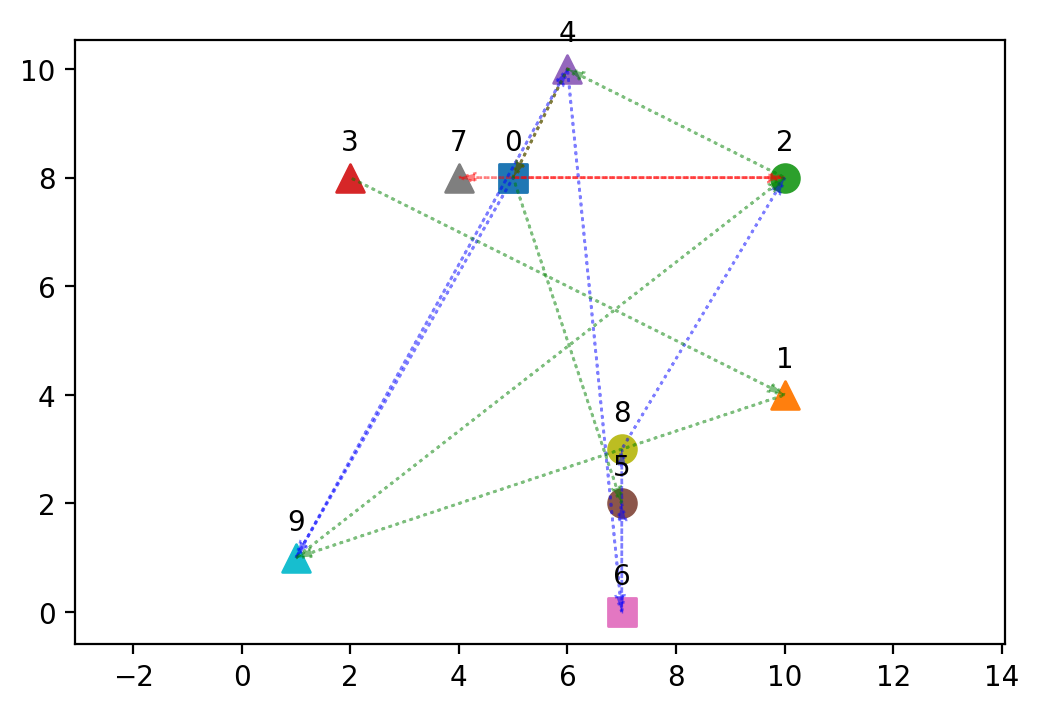

In [126]:
draw_multi(sol)

In [127]:
class multi_search:
    def __init__(self, gp):
        self.gp = gp
    
    def annealing(self, cyclic=None, t0=10000):
        t = t0
        current = multi_solution(self.gp)
        current.randomize(cyclic=cyclic)
        current.fit()
        
        best = current
        
        while t > 1:
            neighbour = current.get_random_neighbour(cyclic=cyclic)
            neighbour.fit()
            
            # cooling down
            t = self.update_temp(t)
            
            if neighbour.fitness < best.fitness:
                current = neighbour
                if current.is_valid():
                    best = current
                    print(best)
            elif self.thermodynamic_probability(current.fitness, neighbour.fitness, t) > random.random():
                current = neighbour
        
        return best
    
    def thermodynamic_probability(self, current, neighbour, temperature):
        delta = current - neighbour
        return math.exp(delta/temperature)
    
    def update_temp(self, t):
        return t*0.997
            
            

In [136]:
# this proves that my design of neighbourhood structure and annealing algorithm work as expected -> they converge to an optimal solution
search = multi_search(gp)
res = search.annealing(t0=10000)

Adding 3 of station 0 to line
Adding 3 of station 1 to line
Adding 3 of station 2 to line
Adding 1 of station 3 to line
Adding 2 of station 4 to line
Adding 2 of station 5 to line
Adding 2 of station 6 to line
Adding 3 of station 7 to line
Adding 2 of station 8 to line
Adding 2 of station 9 to line
Fitness: 116.5685424949238
3 → 7 → 1 → 5 → 8 → 2 → 0 → 9 → 6 CB: 5
4 → 0 → 9 → 1 → 2 → 6 → 7 CB: 1
2 → 1 → 5 → 4 → 0 → 8 → 7 CB: 0

Fitness: 109.74011537017762
8 → 3 → 7 → 1 → 5 → 2 → 9 → 0 → 6 CB: 7
4 → 0 → 9 → 1 → 2 → 7 CB: 1
2 → 1 → 5 → 4 → 0 → 8 → 7 CB: 1

Fitness: 108.08326112068524
3 → 7 → 1 → 9 → 5 → 0 → 6 CB: None
2 → 1 → 9 → 0 → 4 → 7 CB: 4
8 → 5 → 4 → 0 → 1 → 7 CB: 4

Fitness: 101.66904755831214
3 → 7 → 1 → 9 → 5 → 0 → 6 CB: 4
2 → 1 → 9 → 0 → 4 → 7 CB: 3
8 → 5 → 4 → 0 → 1 → 7 CB: 4

Fitness: 98.08326112068524
3 → 7 → 1 → 9 → 5 → 0 → 6 CB: 4
2 → 1 → 9 → 0 → 4 → 7 CB: 5
8 → 5 → 4 → 0 → 1 → 7 CB: 4

Fitness: 97.9827560572969
3 → 7 → 1 → 9 → 0 → 6 CB: None
2 → 9 → 0 → 4 → 7 CB: 4
8 → 5

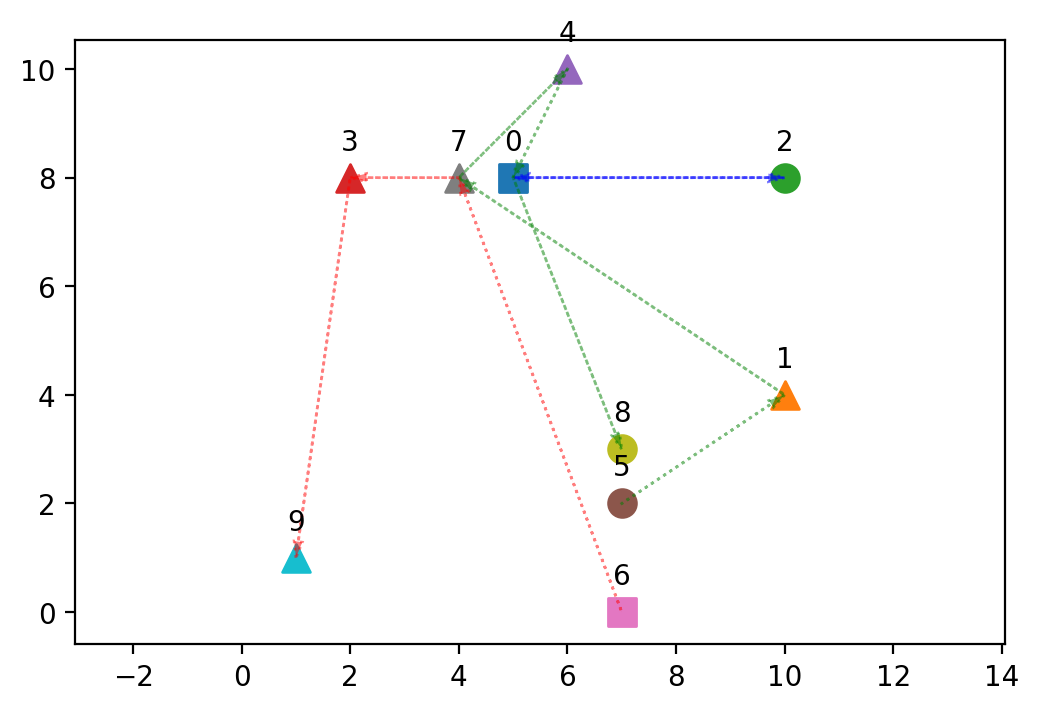

In [137]:
draw_multi(res)

In [92]:
res.is_valid()

True